코드 1-1

In [1]:
!pip install opencv-python matplotlib

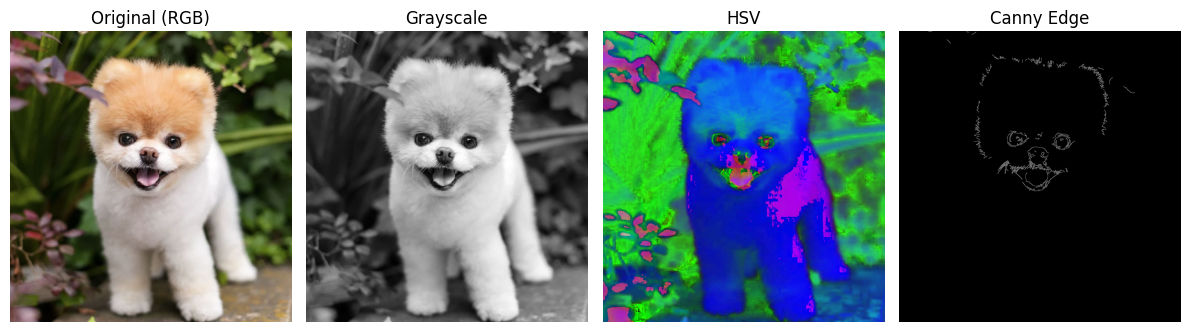

In [2]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 로딩
img = cv2.imread("/content/dog.png")  # BGR 포맷
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. 색상 공간 변환
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. 경계 검출
edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)

# 4. 결과 시각화
titles = ['Original (RGB)', 'Grayscale', 'HSV', 'Canny Edge']
images = [img_rgb, img_gray, img_hsv, edges]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    if i == 0 or i == 2:
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

코드 1-2

In [3]:
!pip install opencv-python matplotlib

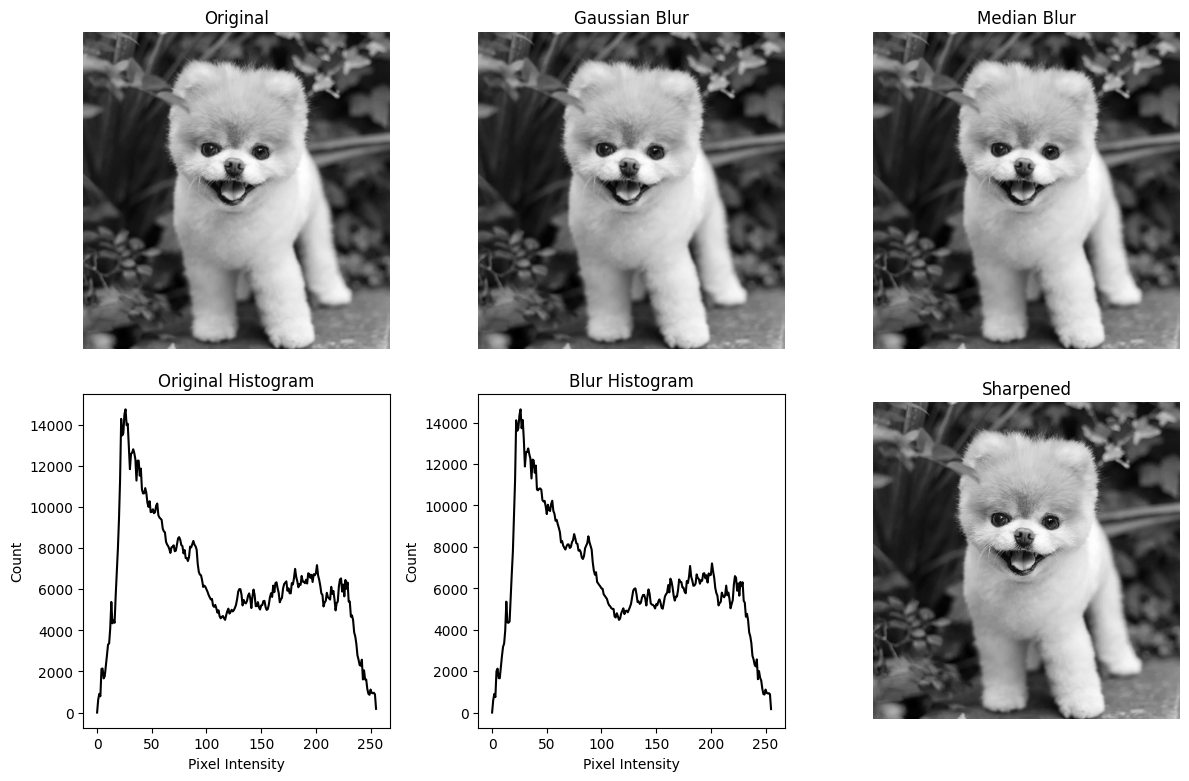

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로딩
img = cv2.imread("/content/dog.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. 필터 적용
blur = cv2.GaussianBlur(gray, (5, 5), 0)
median = cv2.medianBlur(gray, 5)

# 샤프닝 필터 커널
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpen = cv2.filter2D(gray, -1, kernel)

# 2. 히스토그램 계산 함수
def plot_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')

# 3. 결과 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(gray, cmap='gray'), plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2), plt.imshow(blur, cmap='gray'), plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 3, 3), plt.imshow(median, cmap='gray'), plt.title("Median Blur")
plt.axis('off')

plt.subplot(2, 3, 4), plot_histogram(gray, "Original Histogram")
plt.subplot(2, 3, 5), plot_histogram(blur, "Blur Histogram")
plt.subplot(2, 3, 6), plt.imshow(sharpen, cmap='gray'), plt.title("Sharpened")
plt.axis('off')

plt.tight_layout()
plt.show()


코드 1-3

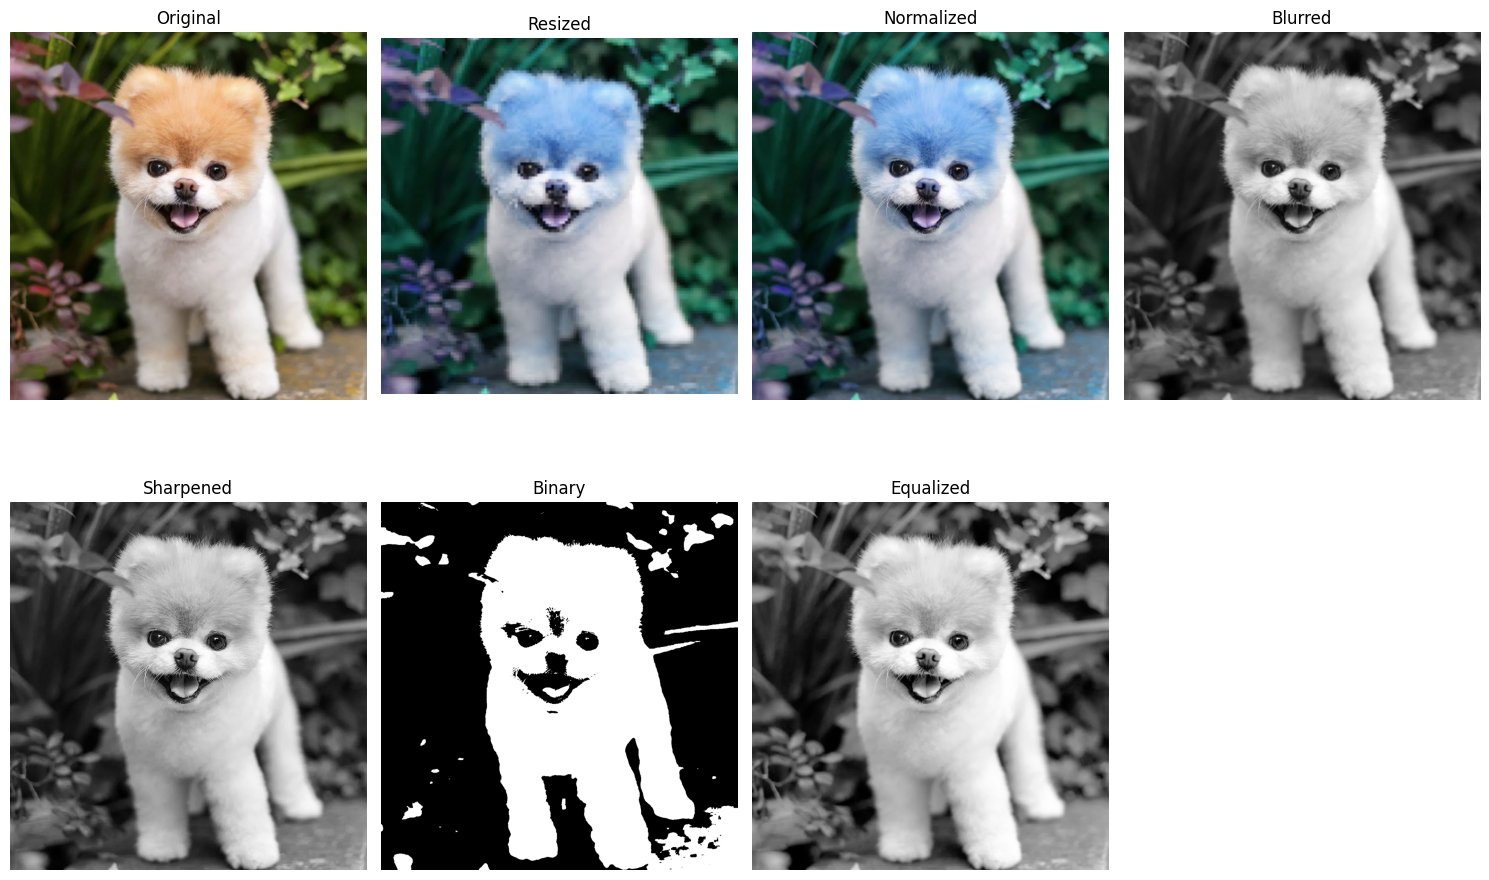

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 원본 이미지 불러오기
img = cv2.imread("/content/dog.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. 크기 조정
resized = cv2.resize(img, (128, 128))

# 2. 정규화
normalized = img / 255.0

# 3. 블러 처리
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 4. 샤프닝
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(gray, -1, kernel)

# 5. 이진화
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 6. 히스토그램 평활화
equalized = cv2.equalizeHist(gray)

# 시각화
titles = ["Original", "Resized", "Normalized", "Blurred", "Sharpened", "Binary", "Equalized"]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), resized, normalized, blurred, sharpened, binary, equalized]

plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(2, 4, i+1)
    if i == 2:
        plt.imshow(images[i])  # normalized RGB
    else:
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

코드 1-4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.6 MB/s eta 0:00:00


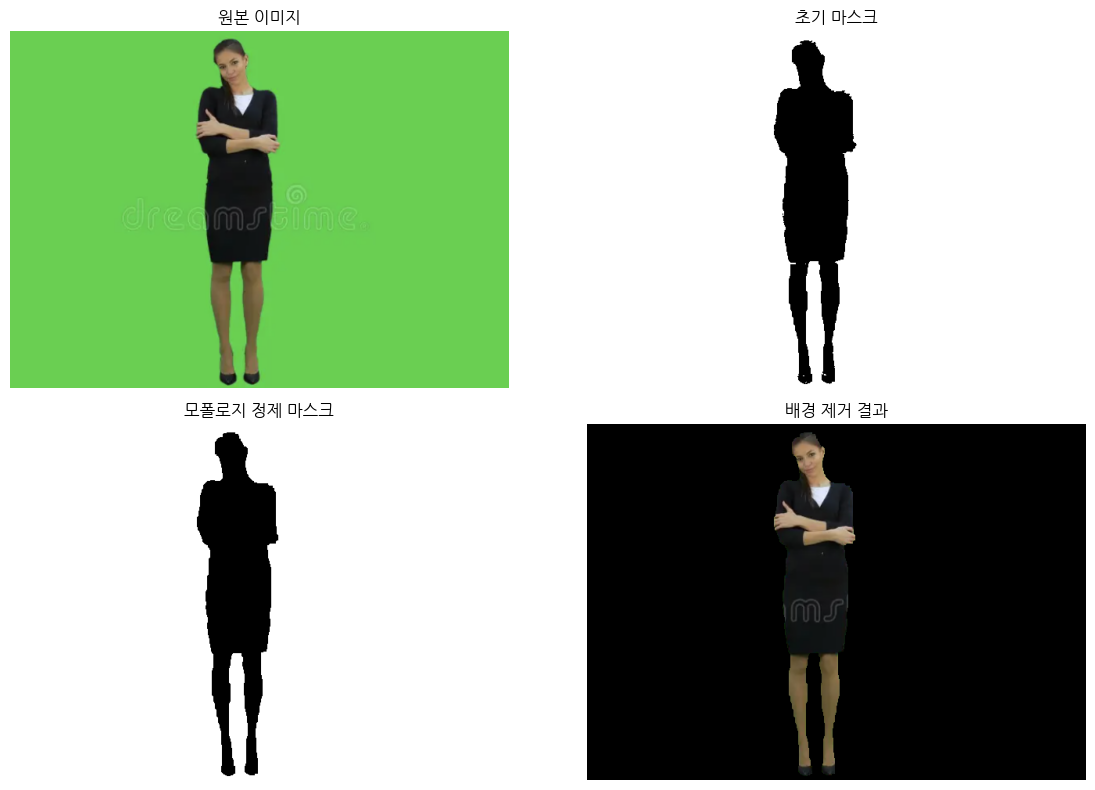

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 1. 이미지 로딩 및 색상 변환
img = cv2.imread("/content/green_screen_sample.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2. 초록 배경 마스크 범위 정의 (예시: 녹색 계열)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

# 3. 모폴로지 연산 (노이즈 제거 및 객체 개선)
kernel = np.ones((5, 5), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 4. 마스크 적용 → 배경 제거
result = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask_clean))

# 5. 시각화
titles = ["원본 이미지", "초기 마스크", "모폴로지 정제 마스크", "배경 제거 결과"]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), mask, mask_clean, cv2.cvtColor(result, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 1 or i == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


코드 1-5

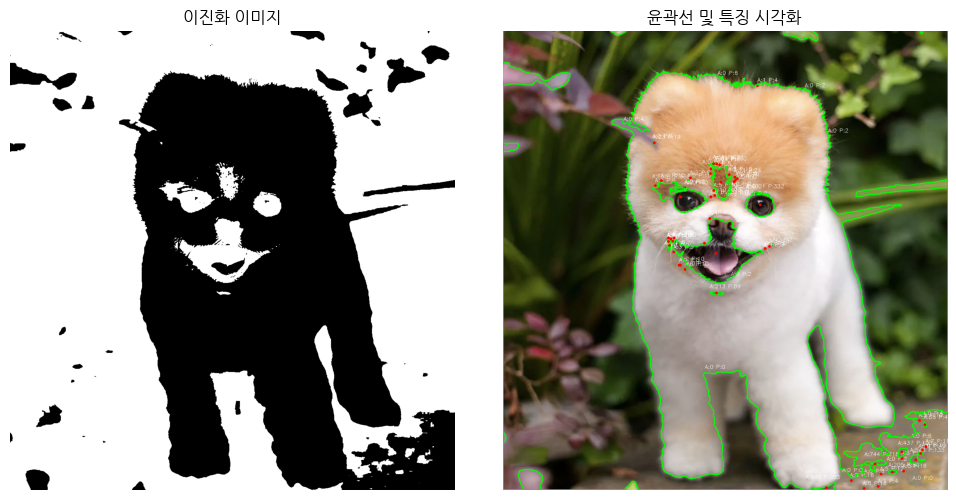

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 로딩 및 그레이스케일 변환
img = cv2.imread("/content/dog.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. 이진화 (Thresholding)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 3. 윤곽선 검출
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. 복사 이미지 위에 시각화 및 특징 추출
output = img.copy()
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"]/M["m00"])
        cy = int(M["m01"]/M["m00"])
    else:
        cx, cy = 0, 0
    rect = cv2.boundingRect(cnt)
    convex = cv2.isContourConvex(cnt)

    # 윤곽선 및 중심점 그리기
    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)
    cv2.circle(output, (cx, cy), 4, (0, 0, 255), -1)
    cv2.putText(output, f"A:{int(area)} P:{int(perimeter)}", (rect[0], rect[1]-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

# 5. 결과 시각화
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("이진화 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("윤곽선 및 특징 시각화")
plt.axis('off')

plt.tight_layout()
plt.show()


코드 1-6

In [10]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [13]:
from ultralytics import YOLO
import cv2
import time
from google.colab.patches import cv2_imshow  # ✅ Colab 전용 이미지 출력 함수

# 1. YOLO 모델 로딩
model = YOLO("yolov8n.pt")

# 2. 이미지 로딩
image_path = "/content/dog.png"  # ← 이미지 경로 설정
image = cv2.imread(image_path)

# 3. YOLO 추론 (CPU 기반)
start = time.time()
results = model.predict(
    source=image,
    imgsz=320,
    conf=0.4,
    iou=0.5,
    device='cpu',     # ✅ Colab은 GPU 미사용 시 CPU 설정
    verbose=False
)
end = time.time()
elapsed = end - start

# 4. 결과 시각화
annotated_image = results[0].plot()
fps_text = f"Inference Time: {elapsed:.3f} sec"
cv2.putText(annotated_image, fps_text, (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# 5. 이미지 출력 (Colab에서는 cv2_imshow 사용)
cv2_imshow(annotated_image)


Output hidden; open in https://colab.research.google.com to view.